In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# Load the dataset
df = pd.read_csv('/content/AI_Syantheticdata - Sheet1.csv')

In [ ]:
df.head()

,Soil,Weather,Pest,State/Region,Seed Quality,Farmer,Farmer Crop Quality,Farmer Field Size,Production
0,1,20,A,Maharshtra,A,F1,A,4,18634
1,2,21,B,Gujrat,B,F2,B,3,16767
2,3,22,C,Rajestan,C,F3,C,20,13816
3,1,20,A,Goa,A,F4,A,20,12759
4,2,21,B,UP,B,F5,B,18,19863


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Soil                  1089 non-null   int64 
 1   Weather               1089 non-null   int64 
 2   Pest                  1089 non-null   object
 3   State/Region          1089 non-null   object
 4   Seed Quality          1089 non-null   object
 5   Farmer                1089 non-null   object
 6   Farmer Crop Quality   1089 non-null   object
 7   Farmer Field Size     1089 non-null   int64 
 8   Production            1089 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
# Define a function to map soil quality to categories
def soil_to_quality(x):
    if x == 1:
        return "High quality"
    elif x == 2:
        return "Medium quality"
    else:
        return "Low quality"

# Apply the function to the "Soil" column and create a new column "Soil Quality"
df["Soil Quality"] = df["Soil"].apply(soil_to_quality)
df.head()

,Soil,Weather,Pest,State/Region,Seed Quality,Farmer,Farmer Crop Quality,Farmer Field Size,Production,Soil Quality
0,1,20,A,Maharshtra,A,F1,A,4,18634,High quality
1,2,21,B,Gujrat,B,F2,B,3,16767,Medium quality
2,3,22,C,Rajestan,C,F3,C,20,13816,Low quality
3,1,20,A,Goa,A,F4,A,20,12759,High quality
4,2,21,B,UP,B,F5,B,18,19863,Medium quality


In [ ]:
# Group the data by Soil Quality and calculate the total production for each group
production_by_quality = df.groupby("Soil Quality")["Production"].sum()

print(production_by_quality)

Soil Quality
High quality      5320836
Low quality       5533442
Medium quality    5335729
Name: Production, dtype: int64


In [ ]:
# Group the data by quality and calculate the sum of production for each quality
grouped_data = df.groupby('Soil Quality')['Production'].sum().reset_index()

# Pivot the data to create a table with quality categories as columns
pivot_table = grouped_data.pivot(index='Soil Quality', columns='Production', values='Production')


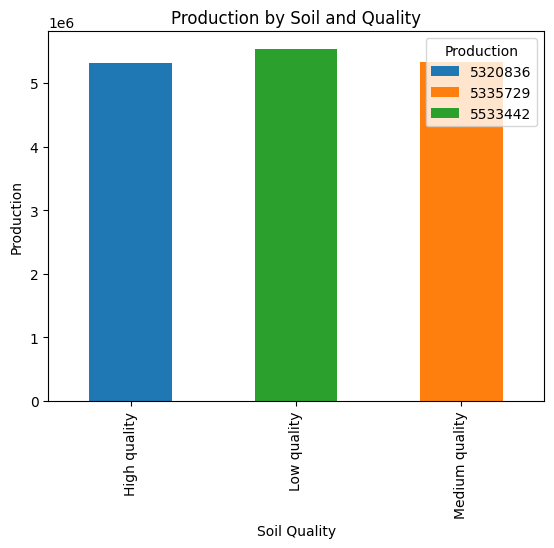

In [ ]:
# Create the bar chart
pivot_table.plot(kind='bar', stacked=True)

# Set the axis labels and title
plt.xlabel('Soil Quality')
plt.ylabel('Production')
plt.title('Production by Soil and Quality')

# Show the plot
plt.show()


In [ ]:
# Split the dataset into train and test sets
train_df = df.sample(frac=0.8, random_state=1)
test_df = df.drop(train_df.index)

In [ ]:
# Train the model
X_train = pd.get_dummies(train_df["Soil Quality"])
y_train = train_df["Production"]
model = LinearRegression().fit(X_train, y_train)


In [ ]:
# Test the model
X_test = pd.get_dummies(test_df["Soil Quality"])
y_test = test_df["Production"]
score = model.score(X_test, y_test)

print("R^2 score:", score)


R^2 score: -0.02448084078260515
